In [1]:
import sys
from pathlib import Path

# Add the workspace root to the Python path
workspace_root = Path.cwd().parent
sys.path.insert(0, str(workspace_root))

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import json
import os
import networkx as nx
plt.style.use('ggplot')
import igraph as ig
import cairo
from src.analysis import load_starwars_graph, load_starwars_igraph

In [2]:
# Construct a relative path from the workspace root (one level up from notebooks) to the data file using pathlib
workspace_root = Path.cwd().parent
file_path = workspace_root / "data" / "starwars" / "starwars-full-interactions-allCharacters-merged.json"

# Load the JSON file
with open(file_path, 'r') as f:
    data = json.load(f)

# Extract all names from the "nodes" category
names = [node['name'] for node in data['nodes']]
num_scenes = [node['value'] for node in data['nodes']]

print(f"Total nodes: {len(names)}")
print(f"Names: {names}")

Total nodes: 111
Names: ['DARTH VADER', 'R2-D2', 'CHEWBACCA', 'BB-8', 'QUI-GON', 'NUTE GUNRAY', 'PK-4', 'TC-14', 'OBI-WAN', 'DOFINE', 'RUNE', 'TEY HOW', 'EMPEROR', 'CAPTAIN PANAKA', 'SIO BIBBLE', 'JAR JAR', 'TARPALS', 'BOSS NASS', 'PADME', 'RIC OLIE', 'WATTO', 'SEBULBA', 'JIRA', 'SHMI', 'C-3PO', 'DARTH MAUL', 'KITSTER', 'WALD', 'FODE/BEED', 'JABBA', 'GREEDO', 'VALORUM', 'MACE WINDU', 'KI-ADI-MUNDI', 'YODA', 'RABE', 'BAIL ORGANA', 'GENERAL CEEL', 'BRAVO TWO', 'BRAVO THREE', 'CAPTAIN TYPHO', 'SENATOR ASK AAK', 'ORN FREE TAA', 'SOLA', 'JOBAL', 'RUWEE', 'TAUN WE', 'LAMA SU', 'BOBA FETT', 'JANGO FETT', 'OWEN', 'BERU', 'CLIEGG', 'COUNT DOOKU', 'SUN RIT', 'POGGLE', 'PLO KOON', 'ODD BALL', 'GENERAL GRIEVOUS', 'FANG ZAR', 'MON MOTHMA', 'GIDDEAN DANU', 'CLONE COMMANDER GREE', 'CLONE COMMANDER CODY', 'TION MEDON', 'CAPTAIN ANTILLES', 'LUKE', 'CAMIE', 'BIGGS', 'LEIA', 'MOTTI', 'TARKIN', 'HAN', 'DODONNA', 'GOLD LEADER', 'WEDGE', 'RED LEADER', 'RED TEN', 'GOLD FIVE', 'RIEEKAN', 'DERLIN', 'ZEV', 'PIE

In [3]:
sources = [link['source'] for link in data['links']]

In [4]:
# Create a dataframe with names and num_scenes
df = pd.DataFrame({
    'name': names,
    'num_scenes': num_scenes
})

df.head()

,name,num_scenes
0,DARTH VADER,190
1,R2-D2,171
2,CHEWBACCA,145
3,BB-8,40
4,QUI-GON,62


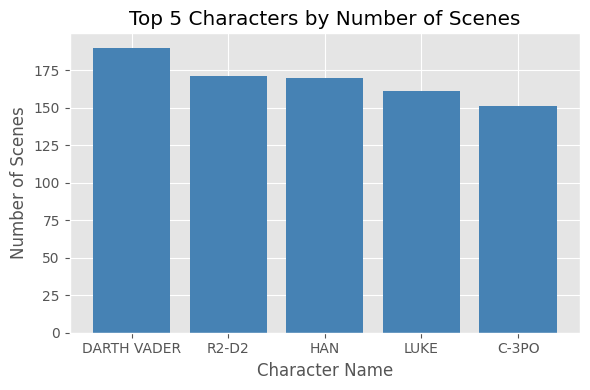

           name  num_scenes
0   DARTH VADER         190
1         R2-D2         171
72          HAN         170
66         LUKE         161
24        C-3PO         151


In [5]:
# Get the top 5 characters by num_scenes
top_5 = df.nlargest(5, 'num_scenes')

# Create a histogram plot
plt.figure(figsize=(6,4))
plt.bar(top_5['name'], top_5['num_scenes'], color='steelblue')
plt.xlabel('Character Name')
plt.ylabel('Number of Scenes')
plt.title('Top 5 Characters by Number of Scenes')
plt.tight_layout()
plt.show()

print(top_5)

# Loading as a graph using Networkx

In [6]:
G = load_starwars_graph()

In [7]:
print(f"Graph has {G.number_of_edges()} edges")
print(f"Graph has {G.number_of_nodes()} nodes")

Graph has 444 edges
Graph has 111 nodes


In [8]:
degrees = dict(G.degree())                # degree
#  dict(G.degree(weight="weight")) # weighted degree
print(degrees)

{'DARTH VADER': 52, 'R2-D2': 22, 'CHEWBACCA': 19, 'BB-8': 12, 'QUI-GON': 27, 'NUTE GUNRAY': 16, 'PK-4': 2, 'TC-14': 5, 'OBI-WAN': 36, 'DOFINE': 3, 'RUNE': 4, 'TEY HOW': 3, 'EMPEROR': 22, 'CAPTAIN PANAKA': 9, 'SIO BIBBLE': 8, 'JAR JAR': 24, 'TARPALS': 1, 'BOSS NASS': 6, 'PADME': 34, 'RIC OLIE': 7, 'WATTO': 6, 'SEBULBA': 6, 'JIRA': 3, 'SHMI': 8, 'C-3PO': 35, 'DARTH MAUL': 4, 'KITSTER': 9, 'WALD': 5, 'FODE/BEED': 3, 'JABBA': 14, 'GREEDO': 4, 'VALORUM': 4, 'MACE WINDU': 13, 'KI-ADI-MUNDI': 9, 'YODA': 17, 'RABE': 5, 'BAIL ORGANA': 17, 'GENERAL CEEL': 4, 'BRAVO TWO': 3, 'BRAVO THREE': 3, 'CAPTAIN TYPHO': 6, 'SENATOR ASK AAK': 7, 'ORN FREE TAA': 3, 'SOLA': 4, 'JOBAL': 4, 'RUWEE': 4, 'TAUN WE': 4, 'LAMA SU': 2, 'BOBA FETT': 10, 'JANGO FETT': 4, 'OWEN': 7, 'BERU': 8, 'CLIEGG': 5, 'COUNT DOOKU': 10, 'SUN RIT': 6, 'POGGLE': 6, 'PLO KOON': 1, 'ODD BALL': 2, 'GENERAL GRIEVOUS': 3, 'FANG ZAR': 4, 'MON MOTHMA': 10, 'GIDDEAN DANU': 4, 'CLONE COMMANDER GREE': 1, 'CLONE COMMANDER CODY': 4, 'TION MEDON':

In [9]:
print(f"Most connected character: {max(G.degree, key=lambda x: x[1])}")
print(f"Nodes list: {G.nodes}")

Most connected character: ('DARTH VADER', 52)
Nodes list: ['DARTH VADER', 'R2-D2', 'CHEWBACCA', 'BB-8', 'QUI-GON', 'NUTE GUNRAY', 'PK-4', 'TC-14', 'OBI-WAN', 'DOFINE', 'RUNE', 'TEY HOW', 'EMPEROR', 'CAPTAIN PANAKA', 'SIO BIBBLE', 'JAR JAR', 'TARPALS', 'BOSS NASS', 'PADME', 'RIC OLIE', 'WATTO', 'SEBULBA', 'JIRA', 'SHMI', 'C-3PO', 'DARTH MAUL', 'KITSTER', 'WALD', 'FODE/BEED', 'JABBA', 'GREEDO', 'VALORUM', 'MACE WINDU', 'KI-ADI-MUNDI', 'YODA', 'RABE', 'BAIL ORGANA', 'GENERAL CEEL', 'BRAVO TWO', 'BRAVO THREE', 'CAPTAIN TYPHO', 'SENATOR ASK AAK', 'ORN FREE TAA', 'SOLA', 'JOBAL', 'RUWEE', 'TAUN WE', 'LAMA SU', 'BOBA FETT', 'JANGO FETT', 'OWEN', 'BERU', 'CLIEGG', 'COUNT DOOKU', 'SUN RIT', 'POGGLE', 'PLO KOON', 'ODD BALL', 'GENERAL GRIEVOUS', 'FANG ZAR', 'MON MOTHMA', 'GIDDEAN DANU', 'CLONE COMMANDER GREE', 'CLONE COMMANDER CODY', 'TION MEDON', 'CAPTAIN ANTILLES', 'LUKE', 'CAMIE', 'BIGGS', 'LEIA', 'MOTTI', 'TARKIN', 'HAN', 'DODONNA', 'GOLD LEADER', 'WEDGE', 'RED LEADER', 'RED TEN', 'GOLD FIVE'

In [10]:
print(nx.shortest_path(G, "DARTH VADER", "TC-14"))

['DARTH VADER', 'OBI-WAN', 'TC-14']


### --- Testing centrality ---

In [11]:
# Degree Centrality is a measure of how important or connected a node is.
# It is number of connections divided by max possible connections (n-1)
degree_cent = nx.degree_centrality(G)
sorted_degree = sorted(degree_cent.items(), key=lambda x: x[1], reverse=True)
print(f"Degree Centrality (top 10):")
for node, centrality in sorted_degree[:10]:
    print(f"  {node}: {centrality:.4f}")

Degree Centrality (top 10):
  DARTH VADER: 0.4727
  OBI-WAN: 0.3273
  C-3PO: 0.3182
  PADME: 0.3091
  QUI-GON: 0.2455
  LUKE: 0.2364
  HAN: 0.2364
  LEIA: 0.2273
  JAR JAR: 0.2182
  R2-D2: 0.2000


In [12]:
# Betweenes Centrality is a measure of how often a node appears on the shortest paths between other nodes.
between_cent = nx.betweenness_centrality(G)
sorted_between = sorted(between_cent.items(), key=lambda x: x[1], reverse=True)
print("Betweenness Centrality (top 10):")
for node, centrality in sorted_between[:10]:
    print(f"  {node}: {centrality:.4f}")

Betweenness Centrality (top 10):
  DARTH VADER: 0.2843
  OBI-WAN: 0.1627
  C-3PO: 0.1391
  LUKE: 0.1309
  HAN: 0.1040
  POE: 0.0730
  CHEWBACCA: 0.0681
  EMPEROR: 0.0641
  PADME: 0.0621
  LEIA: 0.0586


In [13]:
# Closeness Centrality is a measure of how close a node is to all other nodes in the graph.
close_cent = nx.closeness_centrality(G)
sorted_close = sorted(close_cent.items(), key=lambda x: x[1], reverse=True)
print("Closeness Centrality (top 10):")
for node, centrality in sorted_close[:10]:
    print(f"  {node}: {centrality:.4f}")

Closeness Centrality (top 10):
  DARTH VADER: 0.6068
  C-3PO: 0.5596
  OBI-WAN: 0.5567
  HAN: 0.5295
  LUKE: 0.5243
  R2-D2: 0.5143
  LEIA: 0.5143
  CHEWBACCA: 0.5071
  PADME: 0.5047
  EMPEROR: 0.5000


In [14]:
# Eigenvector Centrality is a measure of how important a node is based on the importance of its neighbors.
eigen_cent = nx.eigenvector_centrality(G, weight="weight")
sorted_eigen = sorted(eigen_cent.items(), key=lambda x: x[1], reverse=True)
print("Eigenvector Centrality (top 10):")
for node, centrality in sorted_eigen[:10]:
    print(f"  {node}: {centrality:.4f}")

Eigenvector Centrality (top 10):
  HAN: 0.4662
  CHEWBACCA: 0.4057
  C-3PO: 0.4034
  LEIA: 0.3897
  LUKE: 0.3131
  R2-D2: 0.3110
  OBI-WAN: 0.1686
  DARTH VADER: 0.1550
  LANDO: 0.1126
  FINN: 0.1045


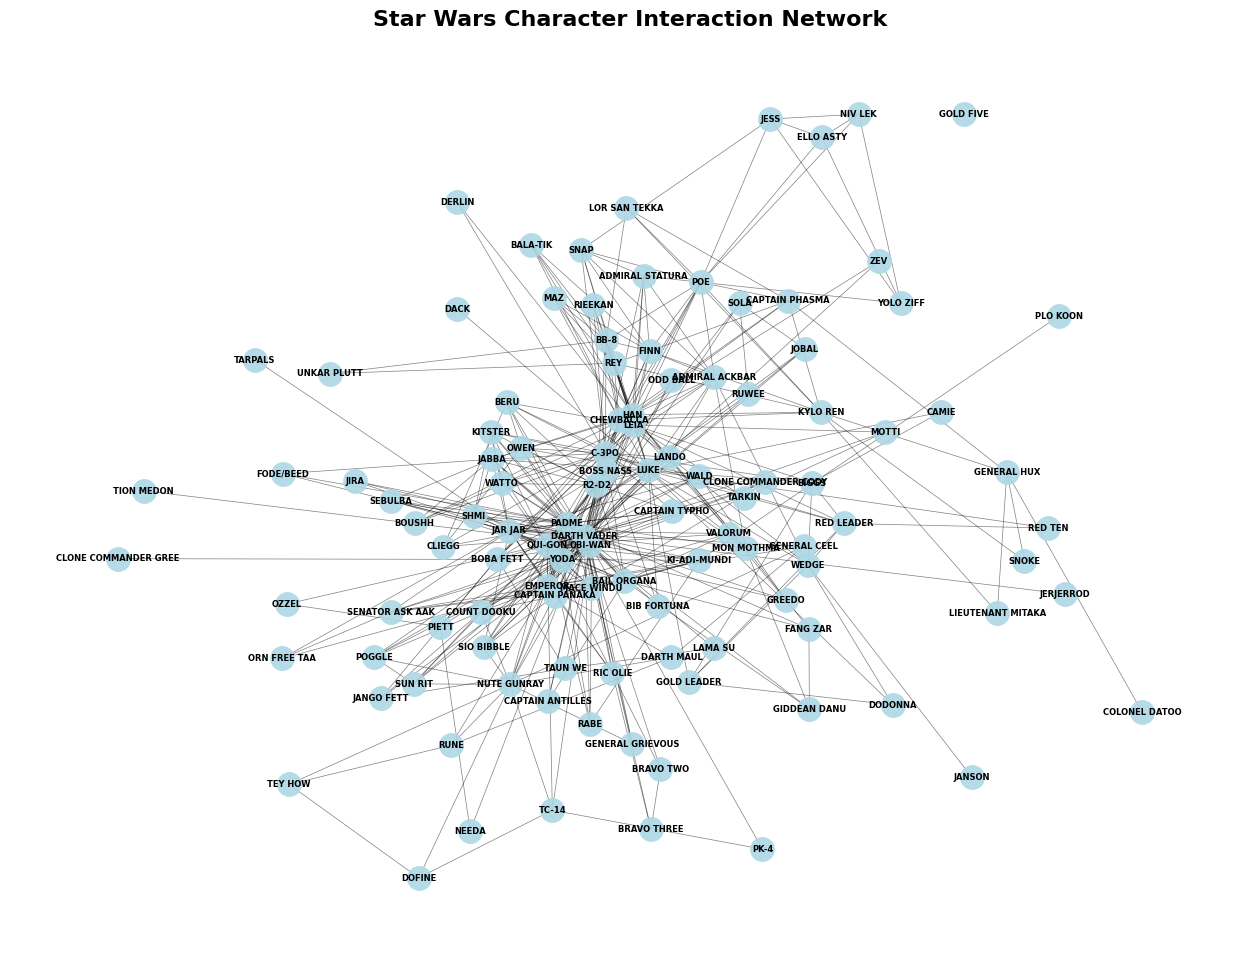

In [15]:
# Visualize the graph
plt.figure(figsize=(16,12))

# Use spring layout for better visualization
pos = nx.spring_layout(G, k=0.5, iterations=50, seed=42)

# Draw the network
nx.draw_networkx_nodes(G, pos, node_size=300, node_color='lightblue', alpha=0.9)
nx.draw_networkx_edges(G, pos, width=0.5, alpha=0.5)
nx.draw_networkx_labels(G, pos, font_size=6, font_weight='bold')

plt.title('Star Wars Character Interaction Network', fontsize=16, fontweight='bold')
plt.axis('off')
#plt.tight_layout()
plt.show()

# Loading as a graph using igraph

In [16]:
g = load_starwars_igraph()

In [17]:
print(f"igraph has {g.ecount()} edges")
print(f"igraph has {g.vcount()} nodes")

igraph has 444 edges
igraph has 111 nodes


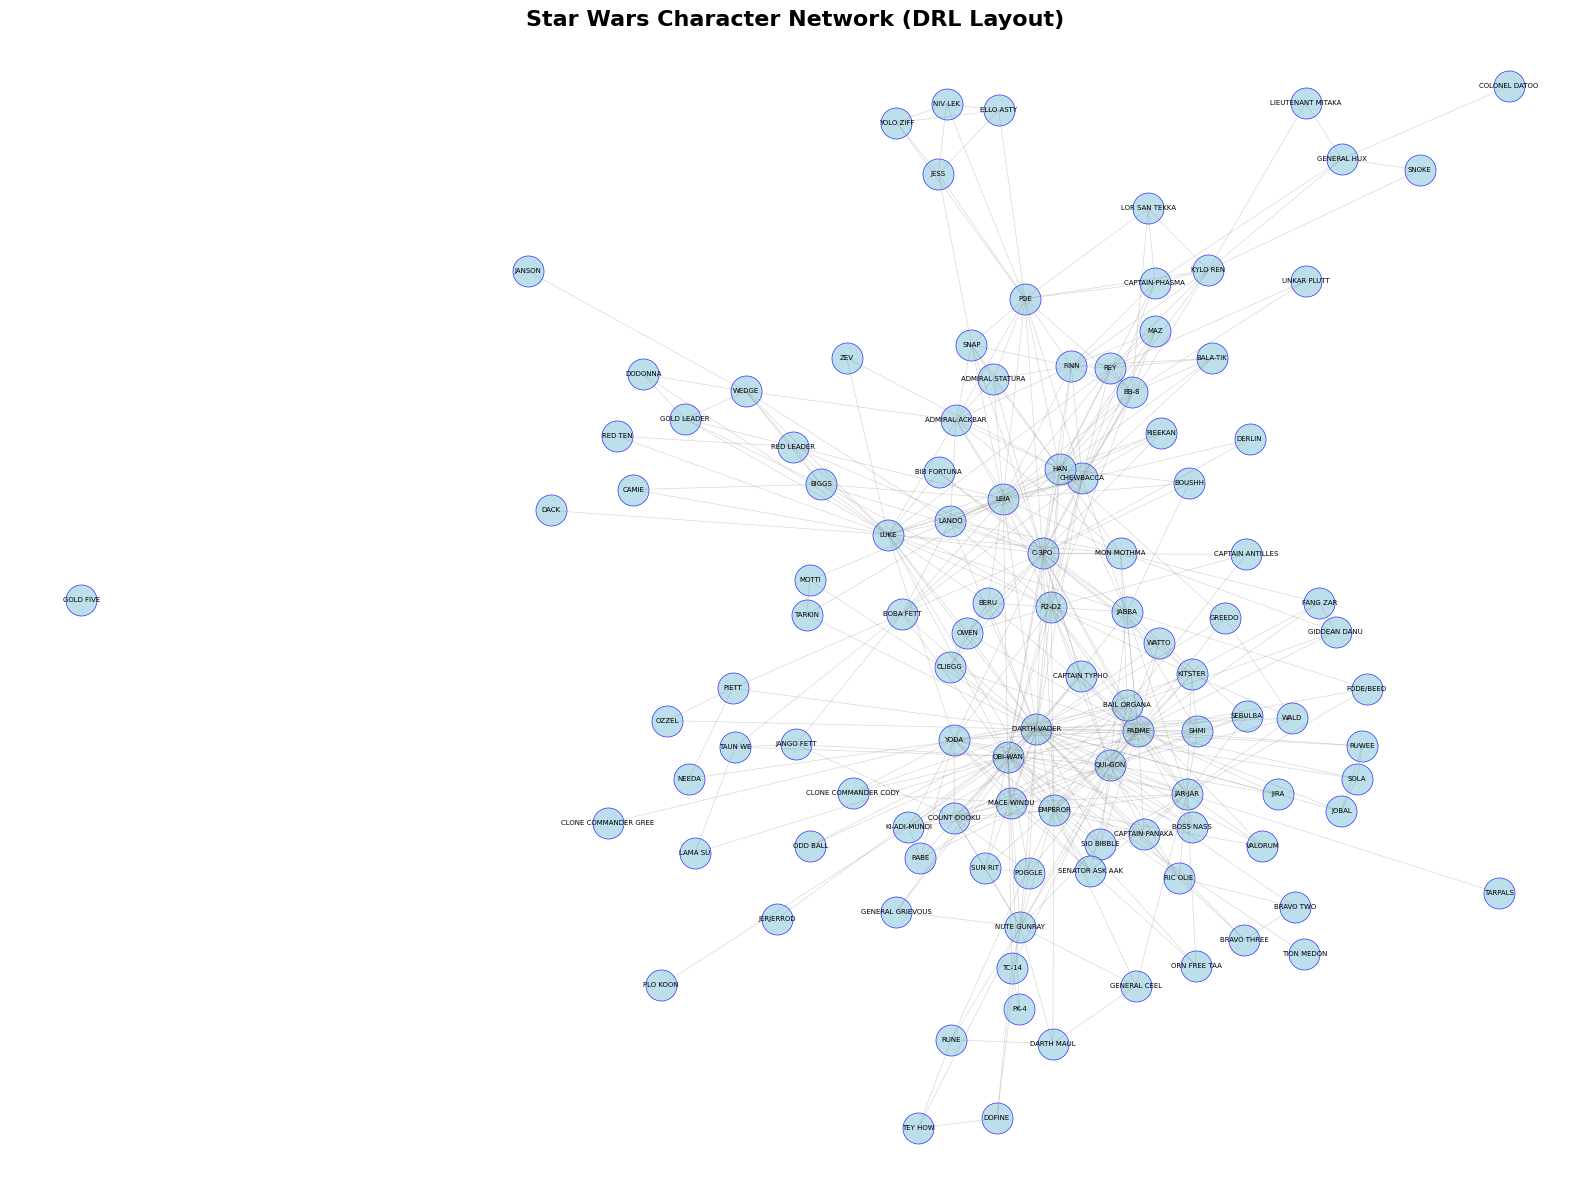

In [ ]:
# Use DRL (Distributed Recursive Layout) - good for large networks
options = {"init_iterations":100, "init_temperature":10}
#layout = g.layout_drl(weights=g.es["weight"],options=options)
layout = g.layout_fruchterman_reingold()

# Convert igraph layout to coordinates for matplotlib
coords = layout.coords

# Create figure with matplotlib
plt.figure(figsize=(16, 12))

# Extract x and y coordinates
x_coords = [coord[0] for coord in coords]
y_coords = [coord[1] for coord in coords]

# Draw edges
for edge in g.es:
    source, target = edge.tuple
    plt.plot([x_coords[source], x_coords[target]], 
             [y_coords[source], y_coords[target]], 
             'gray', alpha=0.3, linewidth=0.5)



# Draw nodes
plt.scatter(x_coords, y_coords, s=500, c='lightblue', alpha=0.8, edgecolors='blue')

# Add labels
for i, name in enumerate(g.vs["name"]):
    plt.annotate(name, (x_coords[i], y_coords[i]), 
                fontsize=5, ha='center', va='center')

plt.title('Star Wars Character Network (DRL Layout)', fontsize=16, fontweight='bold')
plt.axis('off')
plt.tight_layout()
plt.show()